In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [112]:
df=pd.read_csv('sales_data_sample.csv', encoding="latin-1")
df.shape

(2823, 25)

In [113]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [115]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [116]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [117]:
df.drop(columns=['ADDRESSLINE2','STATE','TERRITORY'],inplace=True)

In [118]:
df.isnull().sum()

ORDERNUMBER          0
QUANTITYORDERED      0
PRICEEACH            0
ORDERLINENUMBER      0
SALES                0
ORDERDATE            0
STATUS               0
QTR_ID               0
MONTH_ID             0
YEAR_ID              0
PRODUCTLINE          0
MSRP                 0
PRODUCTCODE          0
CUSTOMERNAME         0
PHONE                0
ADDRESSLINE1         0
CITY                 0
POSTALCODE          76
COUNTRY              0
CONTACTLASTNAME      0
CONTACTFIRSTNAME     0
DEALSIZE             0
dtype: int64

In [119]:
df.dropna(inplace=True)

In [120]:
df.shape

(2747, 22)

In [121]:
from sklearn.preprocessing import LabelEncoder

In [122]:
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype==object:
        df[i]=le.fit_transform(df[i])

In [123]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,84,5,4,12,2004,...,108,32,13,62,33,14,14,24,13,2
2819,10373,29,100.00,1,3978.51,16,5,1,1,2005,...,108,60,87,84,50,50,5,38,56,1
2820,10386,43,100.00,4,5417.57,114,4,1,3,2005,...,108,32,13,62,33,14,14,24,13,1
2821,10397,34,62.24,1,2116.16,130,5,1,3,2005,...,108,1,68,0,66,16,6,58,5,2
2822,10414,47,65.52,9,3079.44,178,3,2,5,2005,...,108,36,74,53,6,26,18,73,32,1


In [124]:
df.drop(columns=['ORDERNUMBER'],inplace=True)

In [125]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,30,95.70,2,2871.00,107,5,1,2,2003,1,...,0,44,48,54,41,0,18,75,36,2
1,34,81.35,5,2765.90,179,5,2,5,2003,1,...,0,63,53,39,55,27,6,27,54,2
2,41,94.74,2,3884.34,198,5,3,7,2003,1,...,0,45,16,21,51,41,6,16,11,1
3,45,83.26,6,3746.70,220,5,3,8,2003,1,...,0,82,75,51,52,49,18,74,31,1
5,36,96.66,1,3479.76,36,5,4,10,2003,1,...,0,76,76,55,12,54,18,29,32,1


In [126]:
df.reset_index(inplace=True)

In [127]:
df.head()

,index,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,0,30,95.70,2,2871.00,107,5,1,2,2003,...,0,44,48,54,41,0,18,75,36,2
1,1,34,81.35,5,2765.90,179,5,2,5,2003,...,0,63,53,39,55,27,6,27,54,2
2,2,41,94.74,2,3884.34,198,5,3,7,2003,...,0,45,16,21,51,41,6,16,11,1
3,3,45,83.26,6,3746.70,220,5,3,8,2003,...,0,82,75,51,52,49,18,74,31,1
4,5,36,96.66,1,3479.76,36,5,4,10,2003,...,0,76,76,55,12,54,18,29,32,1


In [128]:
df.drop(columns=['index'],inplace=True)

In [129]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,30,95.70,2,2871.00,107,5,1,2,2003,1,...,0,44,48,54,41,0,18,75,36,2
1,34,81.35,5,2765.90,179,5,2,5,2003,1,...,0,63,53,39,55,27,6,27,54,2
2,41,94.74,2,3884.34,198,5,3,7,2003,1,...,0,45,16,21,51,41,6,16,11,1
3,45,83.26,6,3746.70,220,5,3,8,2003,1,...,0,82,75,51,52,49,18,74,31,1
4,36,96.66,1,3479.76,36,5,4,10,2003,1,...,0,76,76,55,12,54,18,29,32,1


In [130]:
#from sklearn.preprocessing import StandardScaler

In [131]:
#ss=StandardScaler()
#df=ss.fit_transform(df)
#for i in df.columns:
 #   df[i]=ss.fit_transform(df[[i]])

In [132]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,30,95.70,2,2871.00,107,5,1,2,2003,1,...,0,44,48,54,41,0,18,75,36,2
1,34,81.35,5,2765.90,179,5,2,5,2003,1,...,0,63,53,39,55,27,6,27,54,2
2,41,94.74,2,3884.34,198,5,3,7,2003,1,...,0,45,16,21,51,41,6,16,11,1
3,45,83.26,6,3746.70,220,5,3,8,2003,1,...,0,82,75,51,52,49,18,74,31,1
4,36,96.66,1,3479.76,36,5,4,10,2003,1,...,0,76,76,55,12,54,18,29,32,1


In [164]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

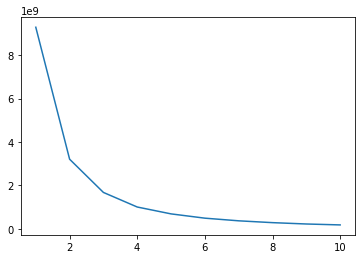

In [165]:
plt.plot(range(1,11), wcss)
plt.xlabel="K"
plt.ylabel="WCSS"
plt.title="Elbow Plot"
plt.show()

In [153]:
df1=df[['PRICEEACH','SALES']]
model=KMeans(n_clusters=3)
clusters=model.fit_predict(df1)
clusters

array([1, 1, 0, ..., 0, 1, 0])

In [154]:
model.cluster_centers_[:,1]

array([4024.17384471, 2083.0084839 , 6930.14832099])

In [155]:
df1['clusters']=clusters

<ipython-input-155-d587aec25b15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clusters']=clusters


In [156]:
df1['clusters'].value_counts()

1    1278
0    1064
2     405
Name: clusters, dtype: int64

In [157]:
df0=df1[df1['clusters']==0]
df1_1=df1[df1['clusters']==1]
df2=df1[df1['clusters']==2]

In [158]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,clusters
0,30,95.70,2,2871.00,107,5,1,2,2003,1,...,44,48,54,41,0,18,75,36,2,1
1,34,81.35,5,2765.90,179,5,2,5,2003,1,...,63,53,39,55,27,6,27,54,2,1
2,41,94.74,2,3884.34,198,5,3,7,2003,1,...,45,16,21,51,41,6,16,11,1,2
3,45,83.26,6,3746.70,220,5,3,8,2003,1,...,82,75,51,52,49,18,74,31,1,2
4,36,96.66,1,3479.76,36,5,4,10,2003,1,...,76,76,55,12,54,18,29,32,1,2


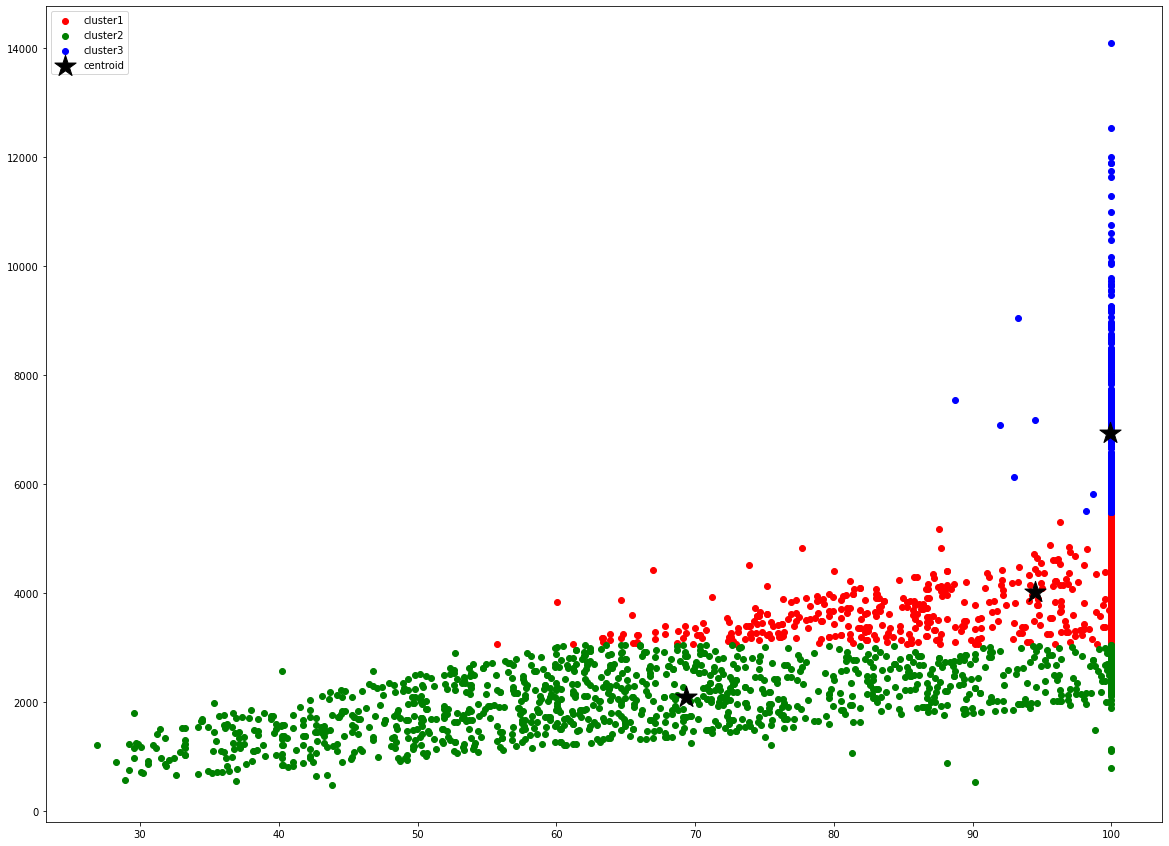

In [163]:
plt.figure(figsize=(20,15))
plt.scatter(df0['PRICEEACH'], df0['SALES'], color='red', label='cluster1')
plt.scatter(df1_1['PRICEEACH'], df1_1['SALES'], color='green', label='cluster2')
plt.scatter(df2['PRICEEACH'], df2['SALES'], color='blue', label='cluster3')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='black',marker='*' ,s=500,label='centroid')
plt.legend()
plt.xlabel="PRICEEACH"
plt.ylabel="SALES"
plt.title='Cluster plot'
plt.show()